# Proyecto Final SINT-616- Minería de Datos M4-2025
##Valeria Solís Monge

El proyecto final del curso Minería de Datos consistió en que en base al dataset 'ventas_supermercado', se debía predecir el monto de ventas de un producto (en este caso se seleccionó café), por medio de un modelo lineal.

##Importar librerías

In [ ]:
import pandas as pd # Manejo de tablas y datos
import numpy as np # Operaciones matemáticas y generación de datos
from google.colab import files # Leer archivos locales
import matplotlib.pyplot as plt # Realizar gráficas
import seaborn as sns # Visualizaciones estadísticas
from sklearn.model_selection import train_test_split # Dividir data en entrenamiento y validación para modelaje
from sklearn.linear_model import LinearRegression # Modelos de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Métricas de evaluación de modelos

##Carga de datos

In [ ]:
uploaded = files.upload()


Saving ventas_supermercado.xlsx to ventas_supermercado.xlsx


In [ ]:
df_ventas = pd.read_excel('ventas_supermercado.xlsx')
df_ventas.head()

,producto,sede,precio,publicidad,descuento,popularidad,tiempo_en_estante,stock_inicial,promocion,demanda_regional,ventas
0,Queso,Puntarenas,2.21,1247.21,0.08,4.0,29.8,64,0,23.130754,98.60
1,Cereal,Puntarenas,3.29,667.96,0.06,6.0,25.8,132,1,17.722831,165.81
2,Café,Heredia,7.90,880.55,0.10,8.0,23.5,97,1,26.530718,182.41
3,Jugo,San José,1.94,513.63,0.14,1.0,29.7,176,0,15.756335,70.00
4,Queso,Puntarenas,5.69,1935.44,0.09,4.0,24.4,95,0,21.570997,117.18


##Preprocesamiento de datos

###Inspección inicial

In [ ]:
# Observar las columnas
df_ventas.columns

Index(['producto', 'sede', 'precio', 'publicidad', 'descuento', 'popularidad',
       'tiempo_en_estante', 'stock_inicial', 'promocion', 'demanda_regional',
       'ventas'],
      dtype='object')

In [ ]:
# Ver la dimensión
df_ventas.shape

(2500, 11)

In [ ]:
# Contenido de las columnas
df_ventas.head()

,producto,sede,precio,publicidad,descuento,popularidad,tiempo_en_estante,stock_inicial,promocion,demanda_regional,ventas
0,Queso,Puntarenas,2.21,1247.21,0.08,4.0,29.8,64,0,23.130754,98.60
1,Cereal,Puntarenas,3.29,667.96,0.06,6.0,25.8,132,1,17.722831,165.81
2,Café,Heredia,7.90,880.55,0.10,8.0,23.5,97,1,26.530718,182.41
3,Jugo,San José,1.94,513.63,0.14,1.0,29.7,176,0,15.756335,70.00
4,Queso,Puntarenas,5.69,1935.44,0.09,4.0,24.4,95,0,21.570997,117.18


In [ ]:
# Tipo de dato de las columnas
df_ventas.dtypes

,0
producto,object
sede,object
precio,float64
publicidad,float64
descuento,float64
popularidad,float64
tiempo_en_estante,float64
stock_inicial,int64
promocion,int64
demanda_regional,float64


In [ ]:
# Descripción de los datos
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   producto           2500 non-null   object 
 1   sede               2500 non-null   object 
 2   precio             2500 non-null   float64
 3   publicidad         2500 non-null   float64
 4   descuento          2500 non-null   float64
 5   popularidad        2375 non-null   float64
 6   tiempo_en_estante  2350 non-null   float64
 7   stock_inicial      2500 non-null   int64  
 8   promocion          2500 non-null   int64  
 9   demanda_regional   2500 non-null   float64
 10  ventas             2500 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 215.0+ KB


In [ ]:
# Ver si hay datos duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [ ]:
# Ver datos nulos
df_ventas.isnull().sum()

,0
producto,0
sede,0
precio,0
publicidad,0
descuento,0
popularidad,125
tiempo_en_estante,150
stock_inicial,0
promocion,0
demanda_regional,0


###Verificar la distribución de los datos para ajustar los valores faltantes

In [ ]:
columnas_interes = ["popularidad", "tiempo_en_estante"]

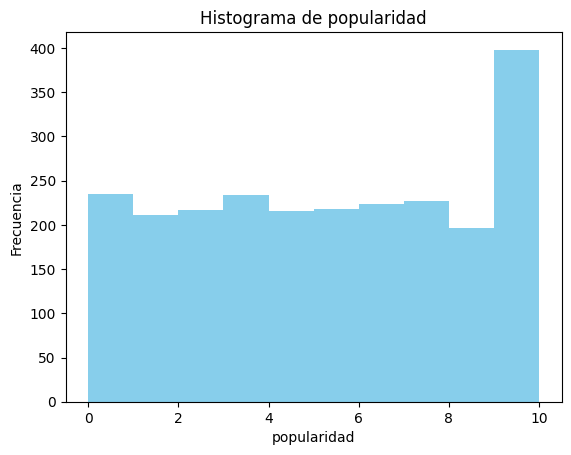

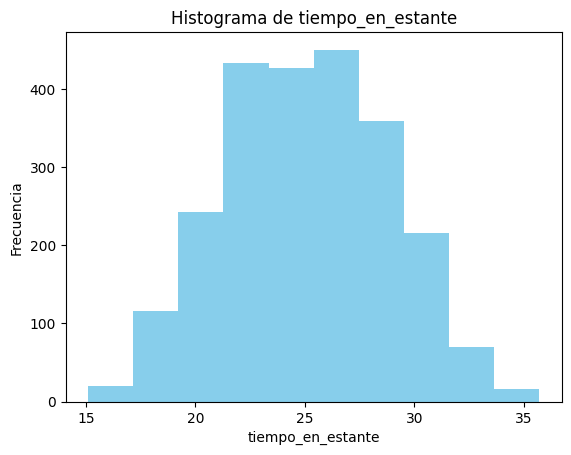

In [ ]:
for var in columnas_interes:
    plt.figure()
    df_ventas[var].hist(bins=10, color = 'skyblue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(False)
    plt.show()

###Hacer un boxplot para visualizar valores atípicos en las columnas de interés

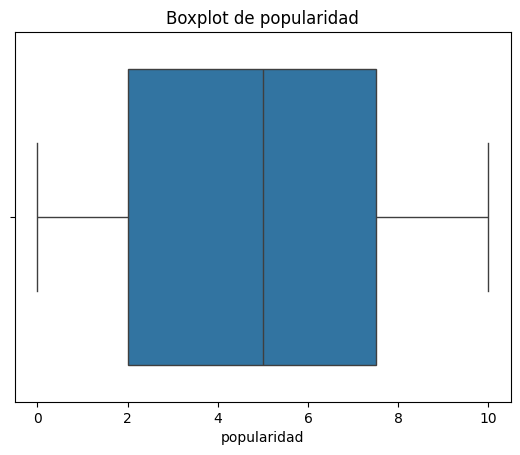

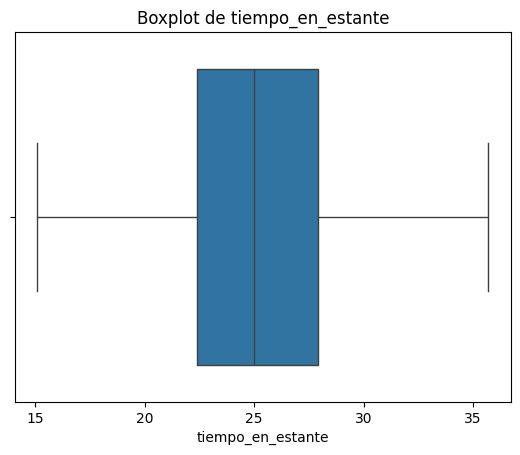

In [ ]:
for var in columnas_interes:
    plt.figure()
    sns.boxplot(x=df_ventas[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

En este caso, como se puede observar la columna de popularidad no posee una distribución normal. Por otro lado, la columna de tiempo en estante si presenta una distribución normal en sus datos, y no se reportan valores atípicos en ninguna de estas columnas.

###Limpieza de datos

###Ajustar los valores faltantes

In [ ]:
# Ajustar valores nulos de popularidad usando la técnica de boostrapping debido a su distribución no normal
datos_pop = df_ventas['popularidad'].dropna().values

datos_nul = df_ventas['popularidad'].isna().sum()

muestras_bootstrap = np.random.choice(datos_pop, size=datos_nul, replace=True)

df_ventas.loc[df_ventas['popularidad'].isna(), 'popularidad'] = muestras_bootstrap

In [ ]:
# Ajustar valores nulos de tiempo en estante con el promedio debido a su distribución normal
df_ventas.loc[:,'tiempo_en_estante'] = df_ventas['tiempo_en_estante'].mean()

In [ ]:
df_ventas.isnull().sum()

,0
producto,0
sede,0
precio,0
publicidad,0
descuento,0
popularidad,0
tiempo_en_estante,0
stock_inicial,0
promocion,0
demanda_regional,0


###Transformación de datos

####Nuevas columnas


Se crea una nueva columna que incluya el precio con el descuento que pagó el consumidor de café, ya que realmente este fue el precio final de cada compra.

In [ ]:
# Crear una nueva columna llamada Precio con descuento
df_ventas['precio_con_descuento'] = df_ventas['precio'] * (1 - df_ventas['descuento'])
df_ventas.head()

,producto,sede,precio,publicidad,descuento,popularidad,tiempo_en_estante,stock_inicial,promocion,demanda_regional,ventas,precio_con_descuento
0,Queso,Puntarenas,2.21,1247.21,0.08,4.0,25.08566,64,0,23.130754,98.60,2.0332
1,Cereal,Puntarenas,3.29,667.96,0.06,6.0,25.08566,132,1,17.722831,165.81,3.0926
2,Café,Heredia,7.90,880.55,0.10,8.0,25.08566,97,1,26.530718,182.41,7.1100
3,Jugo,San José,1.94,513.63,0.14,1.0,25.08566,176,0,15.756335,70.00,1.6684
4,Queso,Puntarenas,5.69,1935.44,0.09,4.0,25.08566,95,0,21.570997,117.18,5.1779


####Codificar variables categóricas

In [ ]:
# Columna Sede
df_ventas = pd.get_dummies(df_ventas, columns=['sede'], drop_first=True, dtype = int)
df_ventas.head()

,producto,precio,publicidad,descuento,popularidad,tiempo_en_estante,stock_inicial,promocion,demanda_regional,ventas,precio_con_descuento,sede_Cartago,sede_Heredia,sede_Puntarenas,sede_San José
0,Queso,2.21,1247.21,0.08,4.0,25.08566,64,0,23.130754,98.60,2.0332,0,0,1,0
1,Cereal,3.29,667.96,0.06,6.0,25.08566,132,1,17.722831,165.81,3.0926,0,0,1,0
2,Café,7.90,880.55,0.10,8.0,25.08566,97,1,26.530718,182.41,7.1100,0,1,0,0
3,Jugo,1.94,513.63,0.14,1.0,25.08566,176,0,15.756335,70.00,1.6684,0,0,0,1
4,Queso,5.69,1935.44,0.09,4.0,25.08566,95,0,21.570997,117.18,5.1779,0,0,1,0


###Crear un nuevo dataframe con el producto de interés (Café)

In [ ]:
producto_cafe = 'Café'
df_cafe = df_ventas[df_ventas['producto'] == producto_cafe].copy()
df_cafe.head()

,producto,precio,publicidad,descuento,popularidad,tiempo_en_estante,stock_inicial,promocion,demanda_regional,ventas,precio_con_descuento,sede_Cartago,sede_Heredia,sede_Puntarenas,sede_San José
2,Café,7.90,880.55,0.10,8.0,25.08566,97,1,26.530718,182.41,7.1100,0,1,0,0
8,Café,6.00,521.38,0.03,2.0,25.08566,248,0,7.709378,70.00,5.8200,0,0,0,0
11,Café,8.35,252.12,0.16,5.0,25.08566,137,1,31.301352,156.96,7.0140,1,0,0,0
12,Café,7.96,1001.46,0.22,4.0,25.08566,183,1,19.527434,135.53,6.2088,0,0,0,1
17,Café,4.97,1838.76,0.17,3.0,25.08566,244,1,11.938355,134.67,4.1251,0,1,0,0


In [ ]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2 to 2457
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   producto              248 non-null    object 
 1   precio                248 non-null    float64
 2   publicidad            248 non-null    float64
 3   descuento             248 non-null    float64
 4   popularidad           248 non-null    float64
 5   tiempo_en_estante     248 non-null    float64
 6   stock_inicial         248 non-null    int64  
 7   promocion             248 non-null    int64  
 8   demanda_regional      248 non-null    float64
 9   ventas                248 non-null    float64
 10  precio_con_descuento  248 non-null    float64
 11  sede_Cartago          248 non-null    int64  
 12  sede_Heredia          248 non-null    int64  
 13  sede_Puntarenas       248 non-null    int64  
 14  sede_San José         248 non-null    int64  
dtypes: float64(8), int64(6), ob

###Exploración de datos

####Estadísticas

In [ ]:
df_cafe.describe()

,precio,publicidad,descuento,popularidad,tiempo_en_estante,stock_inicial,promocion,demanda_regional,ventas,precio_con_descuento,sede_Cartago,sede_Heredia,sede_Puntarenas,sede_San José
count,248.000000,248.000000,248.000000,248.000000,248.00000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,5.738629,983.951411,0.154960,4.709677,25.08566,167.641129,0.362903,20.850187,122.607258,4.849182,0.197581,0.213710,0.165323,0.229839
std,2.445755,566.795659,0.086291,3.120454,0.00000,73.071399,0.481810,16.038090,45.331825,2.142057,0.398979,0.410753,0.372223,0.421580
min,1.500000,100.760000,0.000000,0.000000,25.08566,50.000000,0.000000,-12.954921,70.000000,1.204500,0.000000,0.000000,0.000000,0.000000
25%,3.600000,428.722500,0.080000,2.000000,25.08566,100.000000,0.000000,6.993820,79.322500,3.048450,0.000000,0.000000,0.000000,0.000000
50%,5.780000,955.690000,0.150000,4.000000,25.08566,171.500000,0.000000,20.355896,119.410000,4.930450,0.000000,0.000000,0.000000,0.000000
75%,7.825000,1438.842500,0.230000,7.000000,25.08566,231.000000,1.000000,31.833437,156.840000,6.702500,0.000000,0.000000,0.000000,0.000000
max,9.900000,1993.700000,0.300000,10.000000,25.08566,299.000000,1.000000,61.019549,249.610000,9.340800,1.000000,1.000000,1.000000,1.000000


Interpretación de las estadísticas

En general el count indica los 248 registros completos en cada una de las columnas.
Ahora hablando más específicamente de las columnas:



In [ ]:
df_cafe.precio.describe()

,precio
count,248.000000
mean,5.738629
std,2.445755
min,1.500000
25%,3.600000
50%,5.780000
75%,7.825000
max,9.900000


Precio: Se observa un promedio de 5.73, lo cual significa que los precios tienden a agruparse alrededor de los 5.73 dólares. Una desviación estándar de 2.44 dólares, lo cual significa que los precios pueden variar en un rango de 2.44 dólares hacia abajo o hacia arriba con respecto al promedio. El precio mínimo es de 1.5 dólares. El primer cuartil corresponde a 3.6 dólares, lo cual significa que el 25% del producto tiene un precio menor o igual a 3.6 dólares. El segundo cuartil o la mediana corresponde a 5.78 dólares, lo cual significa que el 50% del producto tiene un precio menor o igual a 5.78 dólares. Y el tercer cuartil corresponde a 7.82 dólares, lo cual significa que el 75% del producto tiene un precio menor o igual a 7.82 dólares. Y el precio máximo es de 9.9 dólares.

In [ ]:
df_cafe.publicidad.describe()

,publicidad
count,248.000000
mean,983.951411
std,566.795659
min,100.760000
25%,428.722500
50%,955.690000
75%,1438.842500
max,1993.700000


Publicidad : Se observa un promedio de 983.95, lo cual significa que los montos de publicidad tienden a agruparse alrededor de los 983.95 dólares. Una desviación estándar de 566.79 dólares, lo cual significa que los montos pueden variar en un rango de 566.79 dólares hacia abajo o hacia arriba con respecto al promedio, lo cual significa una diferencia bastante alta, o sea datos más dispersos del promedio. El monto mínimo es de 100.76 dólares. El primer cuartil corresponde a 428.72 dólares, lo cual significa que el 25% de la publicidad tiene un monto menor o igual a 428.72 dólares. El segundo cuartil o la mediana corresponde a 955.69 dólares, lo cual significa que el 50% de la publicidad tiene un monto menor o igual a 955.69 dólares. Y el tercer cuartil corresponde a 1438.84 dólares, lo cual significa que el 75% de la publicidad tiene un monto menor o igual a 1438.84 dólares. Y el monto máximo es de 1993.70 dólares.

In [ ]:
df_cafe.descuento.describe()

,descuento
count,248.000000
mean,0.154960
std,0.086291
min,0.000000
25%,0.080000
50%,0.150000
75%,0.230000
max,0.300000


Descuento: Se observa un promedio de 0.15%, lo cual significa que los descuentos tienden a agruparse alrededor de los 0.15%. Una desviación estándar de 0.08%, lo cual significa que los montos pueden variar en un rango de 0.08% hacia abajo o hacia arriba con respecto al promedio. El monto mínimo es de 0% (sin descuento). El primer cuartil corresponde a 0.08%, lo cual significa que el 25% de los descuentos son menores o iguales a 0.08%. El segundo cuartil o la mediana corresponde a 0.15%, lo cual significa que el 50% de los descuentos son menores o iguales a 0.15%. Y el tercer cuartil corresponde a 0.23%, lo cual significa que el 75% de los descuentos son menores o iguales a 0.23% dólares. Y el descuento máximo es de 0.30%.

In [ ]:
df_cafe.popularidad.describe()

,popularidad
count,248.000000
mean,4.709677
std,3.120454
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,10.000000


Popularidad: Se observa un promedio de 4.68, lo cual significa que los valores de popularidad tienden a agruparse alrededor de los 4.68. Una desviación estándar de 3.10, lo cual significa que los valores pueden variar en un rango de 3.10 hacia abajo o hacia arriba con respecto al promedio. El valor mínimo es de 0 (no popular). El primer cuartil corresponde a 2, lo cual significa que el 25% de los valores son menores o iguales a 2. El segundo cuartil o la mediana corresponde a 4, lo cual significa que el 50% de los valores son menores o iguales a 4. Y el tercer cuartil corresponde a 7, lo cual significa que el 75% de los valores son menores o iguales a 7. Y el valor máximo es de 10.

In [ ]:
df_cafe.tiempo_en_estante.describe()

,tiempo_en_estante
count,248.00000
mean,25.08566
std,0.00000
min,25.08566
25%,25.08566
50%,25.08566
75%,25.08566
max,25.08566


Tiempo en estante: En el caso de esta columna, todos los valores son iguales en la totalidad de las filas, por ende su desviación estándar es de 0 porque no hay varianza en los datos.

In [ ]:
df_cafe.stock_inicial.describe()

,stock_inicial
count,248.000000
mean,167.641129
std,73.071399
min,50.000000
25%,100.000000
50%,171.500000
75%,231.000000
max,299.000000


Stock inicial: Se observa un promedio de 167.64, lo cual significa que el stock tiende a agruparse alrededor de las 167.64 unidades. Una desviación estándar de 73.07 unidades, lo cual significa que el stock puede variar en un rango de 73.07 unidades hacia abajo o hacia arriba con respecto al promedio, además de datos más dispersos del promedio. La cantidad mínima es de 50 unidades. El primer cuartil corresponde 100 unidades, lo cual significa que el 25% del stock es menor o igual a 100 unidades. El segundo cuartil o la mediana corresponde a 171.50 unidades, lo cual significa que el 50% del stock es menor o igual a 171.50 unidades. Y el tercer cuartil corresponde a 231 unidades, lo cual significa que el 75% del stock es menor o igual a 231 unidades. Y el stock máximo es de 299 unidades.

In [ ]:
df_cafe.promocion.describe()

,promocion
count,248.000000
mean,0.362903
std,0.481810
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Promoción: En este caso, esta variable es binaria, entonces la media que corresponde a 0.36 representa la proporción de registros en donde promocion es 1, lo que quiere decir que un 36% de los registros cuentan con promoción.

In [ ]:
df_cafe.demanda_regional.describe()

,demanda_regional
count,248.000000
mean,20.850187
std,16.038090
min,-12.954921
25%,6.993820
50%,20.355896
75%,31.833437
max,61.019549


Demanda regional: Se observa un promedio de 20.85, lo cual significa que los valores tienden a agruparse alrededor de ese promedio. Una desviación estándar de 16, lo cual significa que los valores pueden variar en un rango de 16 valores hacia abajo o hacia arriba con respecto al promedio. El valor mínimo es de -12.95, lo que se podría tratar de un error o un valor atípico. El primer cuartil corresponde a 6.99, lo cual significa que el 25% de los valores son menores o iguales a 6.99. El segundo cuartil o la mediana corresponde a 20.35, lo cual significa que el 50% de los valores son menores o iguales a 20.35. Y el tercer cuartil corresponde a 31.8, lo cual significa que el 75% de los valores son menores o iguales a 31.8. Y el valor máximo es de 61.

In [ ]:
df_cafe.ventas.describe()

,ventas
count,248.000000
mean,122.607258
std,45.331825
min,70.000000
25%,79.322500
50%,119.410000
75%,156.840000
max,249.610000


Ventas: Se observa un promedio de 122.6, lo cual significa que las ventas tienden a agruparse alrededor de los 122.6 dólares. Una desviación estándar de 45.33 dólares, lo cual significa que los montos pueden variar en un rango de 45.33 dólares hacia abajo o hacia arriba con respecto al promedio, lo cual significa una diferencia bastante alta, o sea datos más dispersos del promedio. La venta mínima es de 70 dólares. El primer cuartil corresponde a 79.32 dólares, lo cual significa que el 25% de las ventas son menores o iguales a 79.32 dólares. El segundo cuartil o la mediana corresponde a 119.4 dólares, lo cual significa que el 50% de las ventas son menores o iguales a 119.4 dólares. Y el tercer cuartil corresponde a 156.84 dólares, lo cual significa que el 75% de las ventas son menores o iguales a 156.84 dólares. Y la venta máxima es de 249.61 dólares.

In [ ]:
df_cafe.precio_con_descuento.describe()

,precio_con_descuento
count,248.000000
mean,4.849182
std,2.142057
min,1.204500
25%,3.048450
50%,4.930450
75%,6.702500
max,9.340800


Precio con descuento: Se observa un promedio de 4.84, lo cual significa que los precios tienden a agruparse alrededor de ese promedio. Una desviación estándar de 2.14, lo cual significa que las edades pueden variar en un rango de 2.14 dólares hacia abajo o hacia arriba con respecto al promedio. El precio mínimo es de 1.2 dólares. El primer cuartil corresponde a 3.04 dólares, lo cual significa que el 25% del producto tiene un precio menor o igual a 3.04 dólares. El segundo cuartil o la mediana corresponde a 4.93 dólares, lo cual significa que el 50% del producto tiene un precio menor o igual a 4.93 dólares. Y el tercer cuartil corresponde a 6.70 dólares, lo cual significa que el 75% del producto tiene un precio menor o igual a 6.70 dólares. Y el precio máximo es de 9.34 dólares.

Finalmente para las sedes (San José, Cartago, Heredia y Puntarenas), se observa que los mayores promedios de ventas se encuentran en la sede de San José (0.22), seguido de Heredia (0.21), y Puntarenas fue la sede con el menor promedio (0.16). Con respecto a las desviaciones estándar se encontraban un poco lejos del promedio en todas las sedes, quiere decir que los datos estaban más dispersos del promedio.

Es importante agregar el coeficiente de variación para las variables de ventas y publicidad, ya que sus valores de desviación estándar son los más diferentes con respecto al promedio en el conjunto de datos, y funciona para determinar la variabilidad.

In [ ]:
# Ventas
#Desviación estándar
desviacion_estandar_ventas= df_cafe['ventas'].std()
print('La desviación estandar de la variable ventas es: ', desviacion_estandar_ventas)
#Promedio
promedio_ventas = df_cafe['ventas'].mean()
print('El promedio de la variable ventas es: ', promedio_ventas)
#Coeficiente de variación
cv=(desviacion_estandar_ventas/promedio_ventas)*100
print('El coeficiente de variación es: ', round(cv,2),'%')

La desviación estandar de la variable ventas es:  45.33182456913843
El promedio de la variable ventas es:  122.60725806451612
El coeficiente de variación es:  36.97 %


In [ ]:
#Publicidad
#Desviación estándar
desviacion_estandar_publ = df_cafe['publicidad'].std()
print('La desviación estandar de la variable publicidad es: ', desviacion_estandar_publ)
#Promedio
promedio_publ = df_cafe['publicidad'].mean()
print('El promedio de la variable publicidad es: ', promedio_publ)
#Coeficiente de variación
cv=(desviacion_estandar_publ/promedio_publ)*100
print('El coeficiente de variación es: ', round(cv,2),'%')

La desviación estandar de la variable publicidad es:  566.7956585774194
El promedio de la variable publicidad es:  983.9514112903227
El coeficiente de variación es:  57.6 %


Y como se puede observar, la variable de publicidad es la que tiene mayor variabilidad en sus datos (57.6% coeficiente de variación).

####Visualizaciones

####Pair plot (ventas-popularidad-publicidad-precio con descuento)

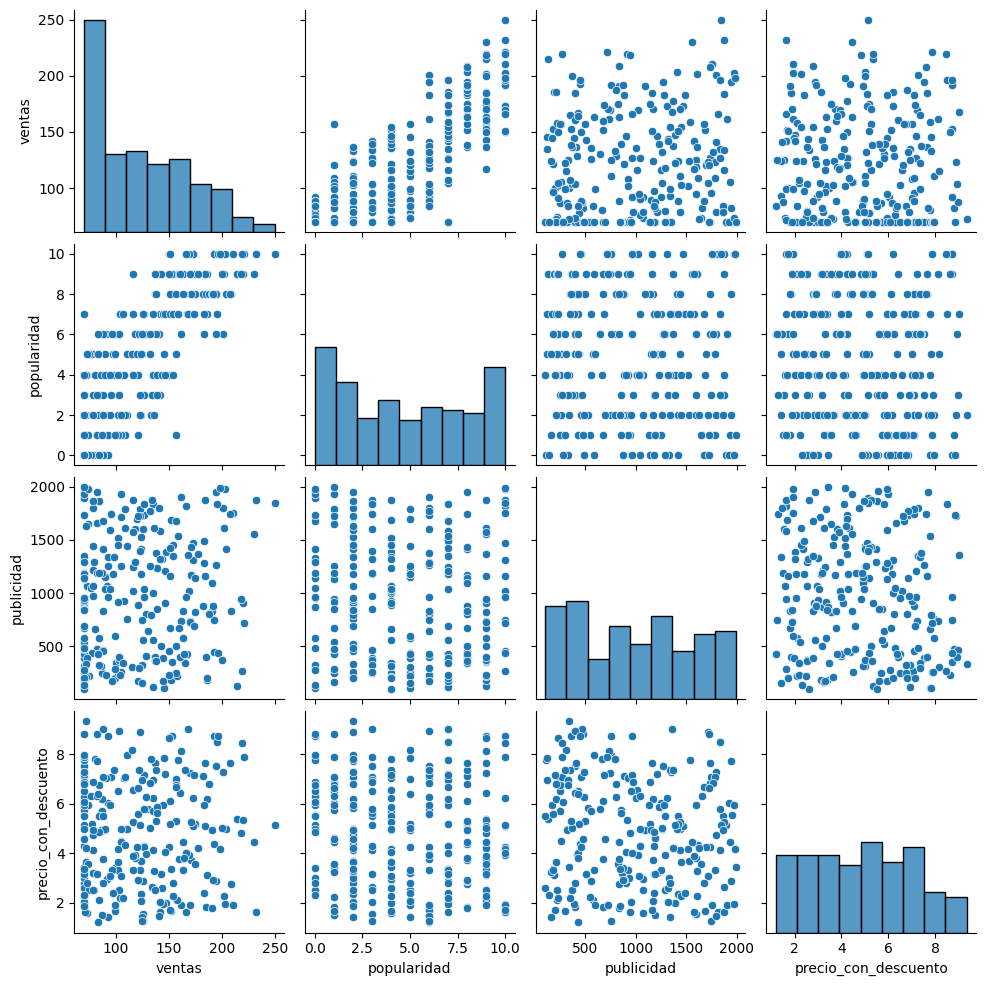

In [ ]:
sns.pairplot(df_cafe[['ventas', 'popularidad', 'publicidad', 'precio_con_descuento']])

El pair plot es muy útil para poder observar gráficos de múltiples variables al mismo tiempo, tanto histogramas para ver la distribución de los datos como de dispersión para poder observar la relación entre variables.
En este caso la variable ventas tiene una distribución con una asimetría positiva, en comparación con las demás variables en donde se observa que no cuentan con una distribución normal.
Por otra parte, según lo que se puede observar en los gráficos de dispersión, los datos se encuentran muy dispersos entre sí, sin embargo si se observa el gráfico de ventas y popularidad, se puede ver que si hay una relación no tan dispersa, ya que indica que a mayor nivel de popularidad del producto, mayor es el nivel de ventas del producto.

#### Barplot para las variables binarias

<ipython-input-35-1106447865>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='promocion', y='ventas', data=df_cafe, palette='viridis', ci='sd')
<ipython-input-35-1106447865>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='promocion', y='ventas', data=df_cafe, palette='viridis', ci='sd')


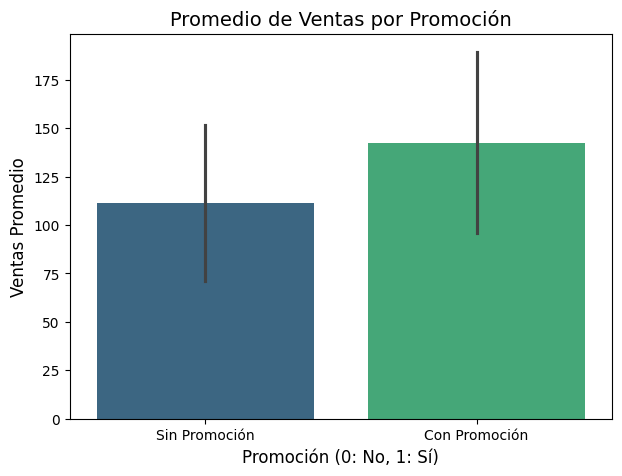

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x='promocion', y='ventas', data=df_cafe, palette='viridis', ci='sd')
plt.title('Promedio de Ventas por Promoción', fontsize=14)
plt.xlabel('Promoción (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.xticks([0, 1], ['Sin Promoción', 'Con Promoción'])
plt.grid(False)
plt.show()

Los barplot son una buena alternativa para visualizar variables binarias, en este caso se realizó un barplot con las ventas promedio por promoción, siendo 1 que el producto contaba con promoción y 0 que no tenía promoción, y como se puede observar, fueron mayores las ventas si el artículo contaba con promoción.

In [ ]:
df_cafe["sede_San José"].value_counts()

,count
sede_San José,
0,191
1,57


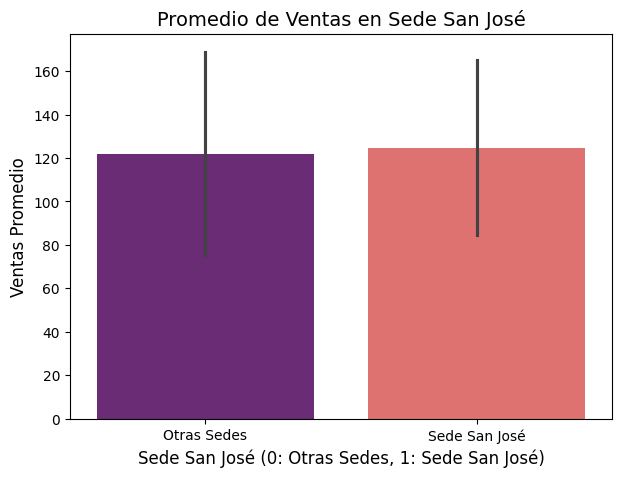

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x='sede_San José', y='ventas', data=df_cafe, palette='magma', errorbar='sd', hue='sede_San José', legend=False)
plt.title('Promedio de Ventas en Sede San José', fontsize=14)
plt.xlabel('Sede San José (0: Otras Sedes, 1: Sede San José)', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.xticks([0, 1], ['Otras Sedes', 'Sede San José'])
plt.grid(False)
plt.show()

Se realizó un value counts en conjunto con un barplot para visualizar cual sede tenía más ventas de café (0 otras sedes y 1 sede San José) y se puede observar que la sede de San José obtuvo ligeramente mayores ventas de café que las otras sedes.

###Scatter plot con color

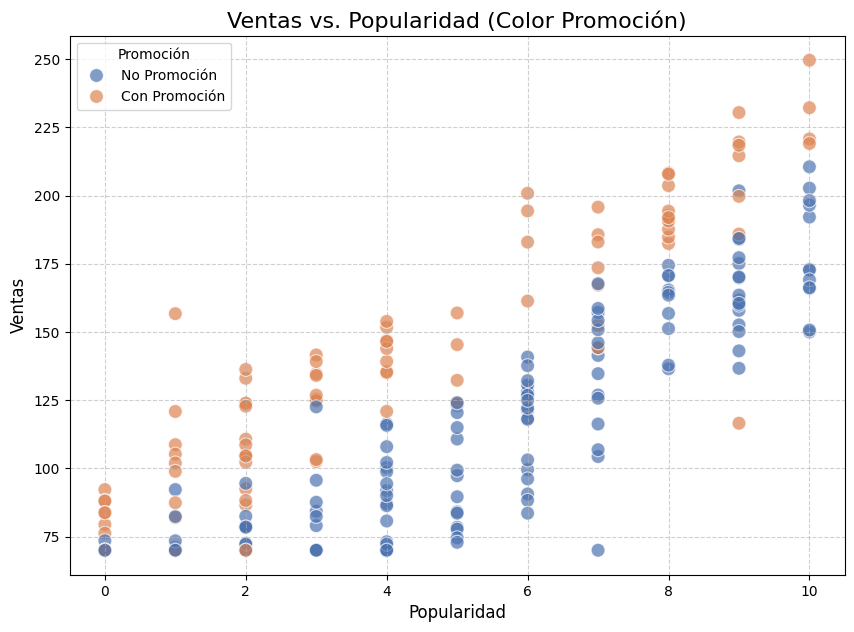

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x='popularidad', y='ventas', hue='promocion', data=df_cafe,
                alpha=0.7, s=100, edgecolor='w', palette='deep')

plt.title('Ventas vs. Popularidad (Color Promoción)', fontsize=16)
plt.xlabel('Popularidad', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Promoción', 'Con Promoción'], title='Promoción')

plt.show()

Un scatter plot brinda una visualización más completa, ya que añade una tercera categoría a un gráfico de dispersión por medio del color, y así se puede observar como la relación entre dos variables puede cambiar por medio de esa categoría extra. En este caso, se ve la relación de ventas y popularidad anteriormente realizada, pero ahora con la categoría de promoción, entonces como se puede ver, efectivamente las ventas aumentan conforme crece la popularidad del café y aún más si este cuenta con una promoción.

###Análisis de Correlación


Para proceder con el análisis de correlación, es necesario eliminar las columnas de producto (ya no es necesaria porque solo se está trabajando con el café, y al ser de texto puede generar un error) y la columna de tiempo_en_estante (esta columna no presenta variación en sus datos ya que es el mismo valor en todas las filas, por lo tanto su desviación estándar es 0 y no genera ninguna correlación con otra variable, por lo tanto no aporta nada a la correlación).

In [ ]:
columnas_eliminadas = ['producto', 'tiempo_en_estante']
df_cafe.drop(columns=columnas_eliminadas, inplace=True)

In [ ]:
matriz_correlacion = df_cafe.corr()
matriz_correlacion

,precio,publicidad,descuento,popularidad,stock_inicial,promocion,demanda_regional,ventas,precio_con_descuento,sede_Cartago,sede_Heredia,sede_Puntarenas,sede_San José
precio,1.000000,-0.136175,0.000909,-0.061392,-0.070006,-0.067878,-0.072045,0.009020,0.968174,0.079151,-0.084338,0.056329,-0.042492
publicidad,-0.136175,1.000000,-0.010042,-0.086404,-0.050583,0.066843,-0.111432,0.120150,-0.136471,0.004307,0.050764,-0.050680,-0.014051
descuento,0.000909,-0.010042,1.000000,-0.000344,-0.032906,0.072413,-0.060708,-0.013411,-0.229685,-0.030930,0.012238,0.033611,0.016393
popularidad,-0.061392,-0.086404,-0.000344,1.000000,0.013107,-0.091209,0.897258,0.816029,-0.066736,-0.070807,0.105459,0.044976,0.001688
stock_inicial,-0.070006,-0.050583,-0.032906,0.013107,1.000000,-0.027335,0.036378,-0.026295,-0.066548,-0.053383,0.080261,-0.041274,0.015305
promocion,-0.067878,0.066843,0.072413,-0.091209,-0.027335,1.000000,-0.068425,0.330935,-0.077870,-0.121780,0.036130,-0.064994,0.145792
demanda_regional,-0.072045,-0.111432,-0.060708,0.897258,0.036378,-0.068425,1.000000,0.756310,-0.064753,-0.076349,0.101188,0.047326,0.009563
ventas,0.009020,0.120150,-0.013411,0.816029,-0.026295,0.330935,0.756310,1.000000,0.005803,-0.083471,0.109318,0.011465,0.026444
precio_con_descuento,0.968174,-0.136471,-0.229685,-0.066736,-0.066548,-0.077870,-0.064753,0.005803,1.000000,0.087910,-0.083351,0.050751,-0.057534
sede_Cartago,0.079151,0.004307,-0.030930,-0.070807,-0.053383,-0.121780,-0.076349,-0.083471,0.087910,1.000000,-0.258697,-0.220840,-0.271077


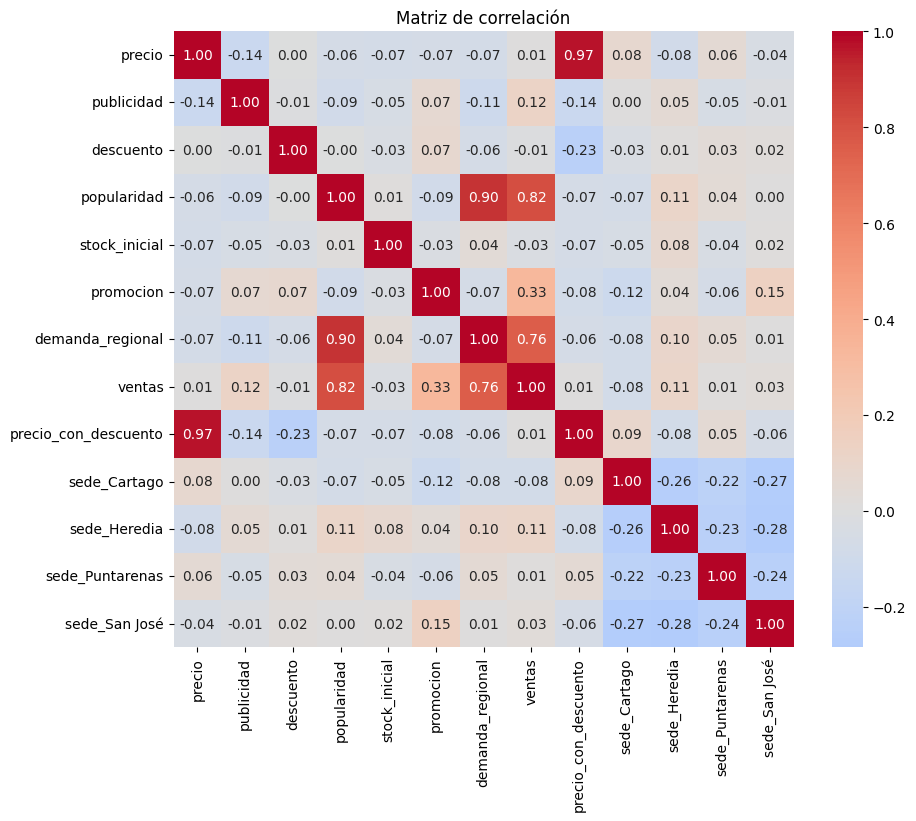

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Umbral de correlación
umbral = 0.6

correlaciones_altas = (
    matriz_correlacion.where(np.triu(np.ones(matriz_correlacion.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

correlaciones_altas.columns = ['Variable_1', 'Variable_2', 'Correlacion']

correlaciones_filtradas = correlaciones_altas[np.abs(correlaciones_altas['Correlacion']) > umbral]

print(correlaciones_filtradas.sort_values(by='Correlacion', ascending=False))

          Variable_1            Variable_2  Correlacion
7             precio  precio_con_descuento     0.968174
35       popularidad      demanda_regional     0.897258
36       popularidad                ventas     0.816029
57  demanda_regional                ventas     0.756310


Una vez realizado el análisis de correlación, se determinó que se deben eliminar ciertas columnas que se encuentran altamente relacionadas, para proseguir con el proceso de modelaje. En este caso, la columna precio y precio con descuento tienen el valor de correlación más alto de todas las variables, por lo tanto se elimina la columna de precio, porque realmente el precio que pagó el consumidor es el que incluye el descuento en el producto. Y con respecto a popularidad y demanda regional, las cuales están muy relacionadas con ventas, se procede a eliminar demanda regional, ya que popularidad puede aportar más información al modelo y sus predicciones.


###Proceso de modelaje

1. Seleccionar las variables predictoras 'X' y la variable a predecir 'y'.

In [ ]:
X = df_cafe.drop(columns=['precio', 'demanda_regional', 'ventas'])
y = df_cafe['ventas']

2. Dividir el set de datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Crear y entrenar el modelo de regresión lineal

In [ ]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

4. Hacer las predicciones con el modelo entrenado

In [ ]:
y_pred = modelo_lineal.predict(X_test)

5. Evaluar los resultados de la prediccción con el set de datos de prueba

5.1 Mostrar los coeficientes que indican cuánto cambia la variable predicha por cada variable predictora.

In [ ]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_lineal.coef_
})
coeficientes

,Variable,Coeficiente
0,publicidad,0.013650
1,descuento,-16.468612
2,popularidad,12.772146
3,stock_inicial,-0.007663
4,promocion,38.916946
5,precio_con_descuento,2.657798
6,sede_Cartago,-0.451674
7,sede_Heredia,-2.264805
8,sede_Puntarenas,-3.861634
9,sede_San José,-5.451461


5.2 Aplicar otras métricas para evaluar el rendimiento del modelo:

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:',mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 13.417841268641835
MAE: 10.617552039167931
R²: 0.9090799641718195


6. Visualizar con una gráfica el comportamiento del modelo comparando las predicciones vs los valores reales.

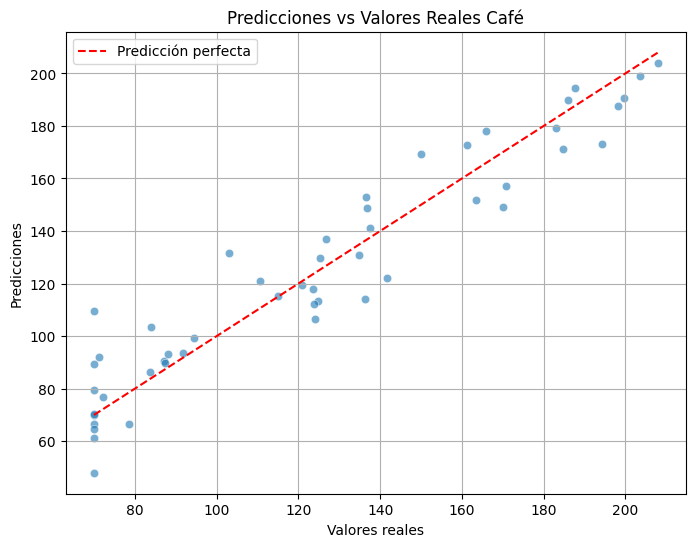

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Predicción perfecta')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales Café')
plt.legend()
plt.grid(True)
plt.show()

###Documentar los resultados del modelo (Interpretación de métricas)

*RMSE (Raíz del error cuadrático medio):* **13.417841268641835**

Esta métrica lo que indica es que las predicciones de las ventas del modelo se desvían aproximadamente 13.41 unidades de las ventas reales. Este valor es bajo con respecto a la escala de las ventas, lo que significa que tiene buena precisión.

*MAE (Error absoluto medio):* **10.617552039167931**

La métrica MAE muestra que, el error absoluto en las predicciones de ventas es de 10.61 unidades, lo que quiere decir que la diferencia entre el valor de la predicción y el valor real es de aproximadamente 10.61 unidades de venta.

*R² (Coeficiente de determinación):* **0.9090799641718195**

Este modelo lineal puede explicar el 90.90% de la variabilidad en las ventas de café, este valor es muy alto y quiere decir que el modelo tiene un buen poder explicativo y predictivo sobre las ventas de café.


Finalmente el modelo lineal ejecutado presenta un buen rendimiento con respecto a la predicción de las ventas de café, con un R² bastante alto y los errores (RMSE y MAE) con valores muy bajos. Lo cual indica que las variables que fueron seleccionadas y el modelado son bastante efectivos para predecir las ventas del producto seleccionado = café.


### Convertir a html

In [ ]:
uploaded = files.upload()

Saving Proyecto_MIN_ValeriaSolis.ipynb to Proyecto_MIN_ValeriaSolis (1).ipynb


In [ ]:
!jupyter nbconvert --to html --output="Proyecto_Valeria_Solis.html" "Proyecto_MIN_ValeriaSolis (1).ipynb"

[NbConvertApp] Converting notebook Proyecto_MIN_ValeriaSolis (1).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 1240471 bytes to Proyecto_Valeria_Solis.html


In [ ]:
files.download("Proyecto_Valeria_Solis.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>